<a href="https://colab.research.google.com/github/Caneralp242/t-p/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json,codecs
import warnings
warnings.filterwarnings("ignore")


In [ ]:
(x_train,_),(x_test,_)=fashion_mnist.load_data()

In [ ]:
x_train=x_train.astype("float32")/(255.0)
x_test=x_test.astype("float32")/(255.0)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape((len(x_train),28*28))
x_test=x_test.reshape((len(x_test),28*28))


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
input_img=Input(shape=(784,))
encoded=Dense(32,activation="relu")(input_img)
encoded=Dense(16,activation="relu")(encoded)
decoded=Dense(32,activation="relu")(encoded)
decoded=Dense(784,activation="sigmoid")(decoded)
autoencoder=Model(input_img,decoded)

autoencoder.compile(optimizer="rmsprop",loss="binary_crossentropy")
hist=autoencoder.fit(x_train,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_train,x_train))

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4084 - val_loss: 0.3502
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3374 - val_loss: 0.3294
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3235 - val_loss: 0.3221
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3173 - val_loss: 0.3149
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3135 - val_loss: 0.3140
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3108 - val_loss: 0.3098
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3088 - val_loss: 0.3081
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3071 - val_loss: 0.3051
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3055 - val_loss: 0.3074
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.3041 - val_lo

In [ ]:
autoencoder.save_weights("autoencoder_model.h5")


In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'val_loss'])


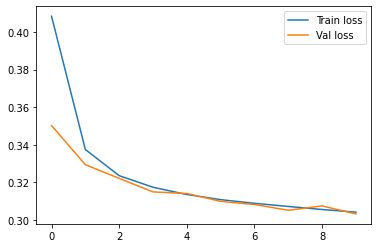

In [ ]:
plt.plot(hist.history["loss"],label="Train loss")
plt.plot(hist.history["val_loss"],label="Val loss")
plt.legend()
plt.show()


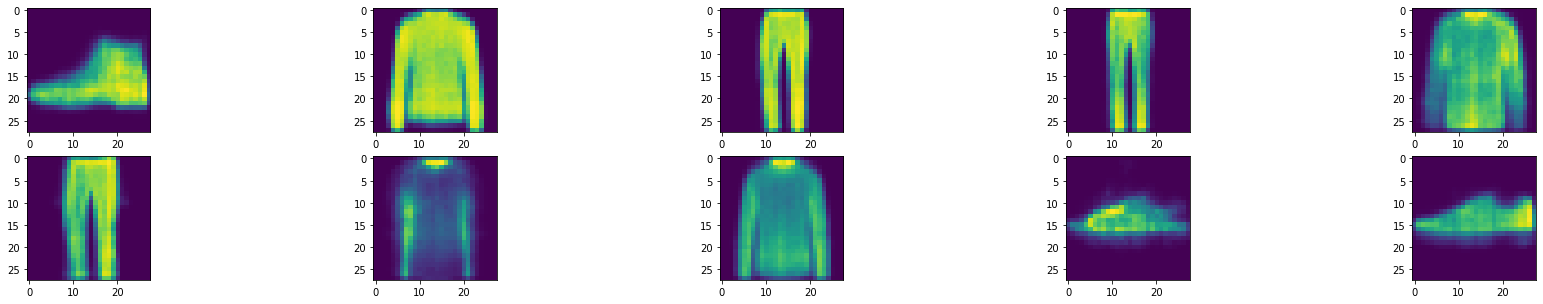

In [ ]:
decoded_imgs=autoencoder.predict(x_test)
fig=plt.figure(figsize=(30,5))
for i in range(10):
  ax=fig.add_subplot(2,5,i+1)
  ax.imshow(decoded_imgs[i].reshape(28,28))


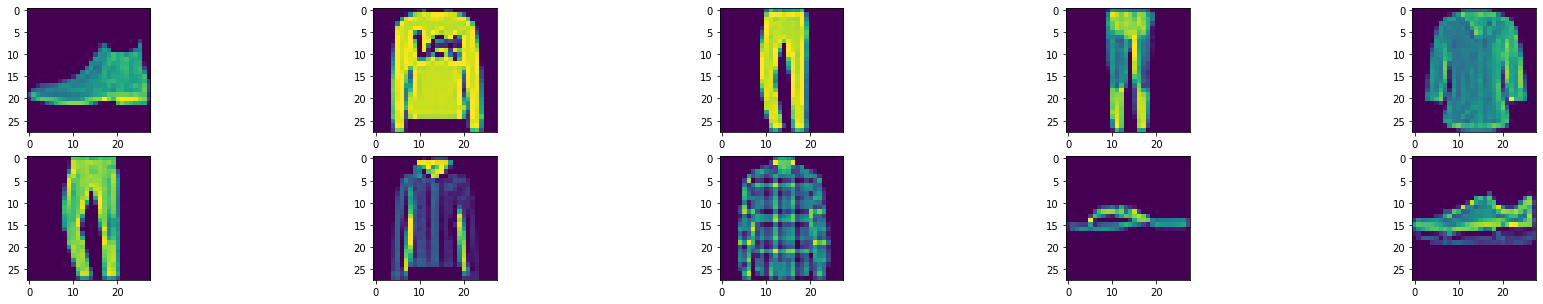

In [ ]:
fig=plt.figure(figsize=(30,5))
for i in range(10):
  ax=fig.add_subplot(2,5,i+1)
  ax.imshow(x_test[i].reshape(28,28))